In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression 
import matplotlib.pylab as pylab
import math,time
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

test_set_size_percentage = 20 
import pandas as pd
from pandas import read_csv
from sklearn.metrics import r2_score,mean_squared_error 

Using TensorFlow backend.


In [2]:
data=pd.read_csv('dataset/irondata.csv',parse_dates=['date'])
df=data[:]

In [3]:
df.tail()

,price,date
343,68.02,2018-08-31
344,68.80,2018-09-30
345,72.02,2018-10-31
346,72.30,2018-11-30
347,68.90,2018-12-31


C:\Users\sumon\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


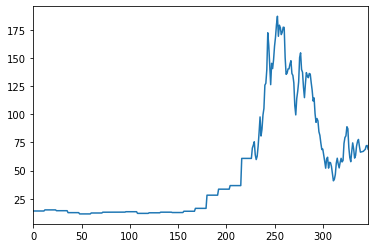

In [4]:
df['price'].plot()
df['price_lag']=df['price'].shift(1)
df=df.set_index('date')
df['rolling_mean_price']=df['price_lag'].rolling(2, min_periods=1).sum()
df=df.dropna()

In [5]:
#df.tail()

In [6]:
# function for min-max normalization of Iron Ore 
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
def normalize_data(df):
    df['price'] = min_max_scaler.fit_transform(df.price.values.reshape(-1,1))
    df['price_lag'] = min_max_scaler.fit_transform(df.price_lag.values.reshape(-1,1))
    df['rolling_mean_price'] = min_max_scaler.fit_transform(df.rolling_mean_price.values.reshape(-1,1))
    return df

In [7]:
# normalize stock
df_stock_norm = df.copy()
df_stock_norm = normalize_data(df_stock_norm)
df_stock_norm.head()

,price,price_lag,rolling_mean_price
date,,,
1990-02-28,0.014795,0.014795,0.000000
1990-03-31,0.014795,0.014795,0.039829
1990-04-30,0.014795,0.014795,0.039829
1990-05-31,0.014795,0.014795,0.039829
1990-06-30,0.014795,0.014795,0.039829


In [8]:
#df_stock_norm.tail()

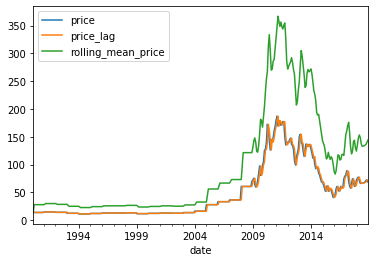

In [9]:
df.plot()

In [10]:
X=df_stock_norm.drop(["price"],axis=1)
y=df_stock_norm['price']
X_train=X[:-1]
y_train=y[:-1]

In [11]:
X_train = X_train.as_matrix() #convert X_train as a matrix for RNN input

C:\Users\sumon\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [12]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)

X_train.shape =  (346, 2)
y_train.shape =  (346,)


In [13]:
#Reshape data for (Sample,Timestep,Features) 
x_train = X_train.reshape((X_train.shape[0],1,X_train.shape[1]))
x_train.shape

(346, 1, 2)

In [134]:
#Build the model
# model = Sequential()
# model.add(LSTM(256,input_shape=(2,1))) # 2 feature with one time stamps
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1))
# model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])

d = 0.3
model = Sequential()

model.add(LSTM(32, input_shape=(1,2), return_sequences=True))
model.add(Dropout(d))

model.add(LSTM(32, input_shape=(1,2), return_sequences=False))
model.add(Dropout(d))

model.add(Dense(16,kernel_initializer="uniform",activation='relu'))        
model.add(Dense(1,kernel_initializer="uniform",activation='linear'))

# adam = keras.optimizers.Adam(decay=0.2)

start = time.time()
model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
print("Compilation Time : ", time.time() - start)

Compilation Time :  0.026849985122680664


In [135]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 1, 32)             4480      
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 13,345
Trainable params: 13,345
Non-trainable params: 0
_________________________________________________________________


In [136]:
#Fit model with history to check for overfitting
history = model.fit(x_train,y_train,epochs=20,shuffle=False)

Epoch 1/20
346/346 [==============================] - 2s 6ms/step - loss: 0.1099 - acc: 0.0347     
Epoch 2/20
346/346 [==============================] - 0s 92us/step - loss: 0.1062 - acc: 0.0347   
Epoch 3/20
346/346 [==============================] - 0s 98us/step - loss: 0.1022 - acc: 0.0347   
Epoch 4/20
346/346 [==============================] - 0s 95us/step - loss: 0.0978 - acc: 0.0347   
Epoch 5/20
346/346 [==============================] - 0s 92us/step - loss: 0.0929 - acc: 0.0347   
Epoch 6/20
346/346 [==============================] - 0s 92us/step - loss: 0.0871 - acc: 0.0347
Epoch 7/20
346/346 [==============================] - 0s 95us/step - loss: 0.0805 - acc: 0.0347
Epoch 8/20
346/346 [==============================] - 0s 95us/step - loss: 0.0738 - acc: 0.0347
Epoch 9/20
346/346 [==============================] - 0s 92us/step - loss: 0.0665 - acc: 0.0347
Epoch 10/20
346/346 [==============================] - 0s 98us/step - loss: 0.0598 - acc: 0.0347
Epoch 11/20
346/346 [==

In [137]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [138]:
# load json and create model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Loaded model from disk


In [139]:
prediction=[]
test_forecast=X[-1:]
t=test_forecast.values
t=t[0][0]
test_forecast

,price_lag,rolling_mean_price
date,,
2018-12-31,0.34627,0.369288


In [140]:
t #last row price lag value

0.34626984578614917

In [141]:
#last value which will have predicted
print(X[-1:])
print(y[-1:])

            price_lag  rolling_mean_price
date                                     
2018-12-31    0.34627            0.369288
date
2018-12-31    0.326922
Name: price, dtype: float64


In [142]:
print(test_forecast.shape)
test_forecast = test_forecast.as_matrix()
test_forecast = np.reshape(test_forecast,(1,1,2))
print(test_forecast.shape)

(1, 2)
(1, 1, 2)


C:\Users\sumon\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [143]:
test_data_index = pd.date_range(start='1/1/2019', periods=24,freq='M')
test_data_index

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

In [144]:
test_data = pd.DataFrame()
test_data['date'] = test_data_index

In [145]:
for i in range(1,len(test_data)+1):
    m=model.predict(test_forecast)
    print("predict price = ",m.tolist()[0][0])
    print("last price_lag = ", t)
    forecastdf=pd.DataFrame(columns=['price_lag'])
    forecastdf['price_lag']=[t,m.tolist()[0][0]]
    forecastdf['rolling_mean_price']=forecastdf['price_lag'].rolling(2, min_periods=1).mean()
    print(forecastdf)
    test_forecast=forecastdf[-1:]
    test_forecast = test_forecast.as_matrix()
    test_forecast = np.reshape(test_forecast,(1,1,2))
    t=m.tolist()[0][0]
    prediction.append(m.tolist()[0][0])

predict price =  0.32933467626571655
last price_lag =  0.34626984578614917
   price_lag  rolling_mean_price
0   0.346270            0.346270
1   0.329335            0.337802
predict price =  0.3154999613761902
last price_lag =  0.32933467626571655
   price_lag  rolling_mean_price
0   0.329335            0.329335
1   0.315500            0.322417
predict price =  0.30722397565841675
last price_lag =  0.3154999613761902
   price_lag  rolling_mean_price
0   0.315500            0.315500
1   0.307224            0.311362
predict price =  0.3017897605895996
last price_lag =  0.30722397565841675
   price_lag  rolling_mean_price
0   0.307224            0.307224
1   0.301790            0.304507
predict price =  0.29835033416748047
last price_lag =  0.3017897605895996
   price_lag  rolling_mean_price
0    0.30179             0.30179
1    0.29835             0.30007
predict price =  0.2961527109146118
last price_lag =  0.29835033416748047
   price_lag  rolling_mean_price
0   0.298350            0.2

C:\Users\sumon\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [146]:
#prediction
#len(prediction)

In [147]:
test_data['forecast_price'] = prediction #normalize value

In [148]:
test_data

,date,forecast_price
0,2019-01-31,0.329335
1,2019-02-28,0.315500
2,2019-03-31,0.307224
3,2019-04-30,0.301790
4,2019-05-31,0.298350
5,2019-06-30,0.296153
6,2019-07-31,0.294756
7,2019-08-31,0.293867
8,2019-09-30,0.293303
9,2019-10-31,0.292944


In [149]:
data

,price,date
0,14.05,1990-01-31
1,14.05,1990-02-28
2,14.05,1990-03-31
3,14.05,1990-04-30
4,14.05,1990-05-31
5,14.05,1990-06-30
6,14.05,1990-07-31
7,14.05,1990-08-31
8,14.05,1990-09-30
9,14.05,1990-10-31


In [150]:
def denormalize(df, normalized_value): 
    df = df['price'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    #return df.shape, p.shape
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

newp = denormalize(data, np.array(prediction))
#newy_test = denormalize(data[90:], np.array(actual_price))

In [151]:
newp

array([[69.32398266],
       [66.89280821],
       [65.43846924],
       [64.48351463],
       [63.87910422],
       [63.49291589],
       [63.24743963],
       [63.09130935],
       [62.99210702],
       [62.92908825],
       [62.88906586],
       [62.86364991],
       [62.84751422],
       [62.83726509],
       [62.83076053],
       [62.82662318],
       [62.8240046 ],
       [62.82234441],
       [62.82129175],
       [62.82062139],
       [62.82019194],
       [62.81991961],
       [62.81974155],
       [62.8196368 ]])

In [152]:
test_data['denorm_price'] = newp

In [153]:
test_data = test_data.set_index('date')

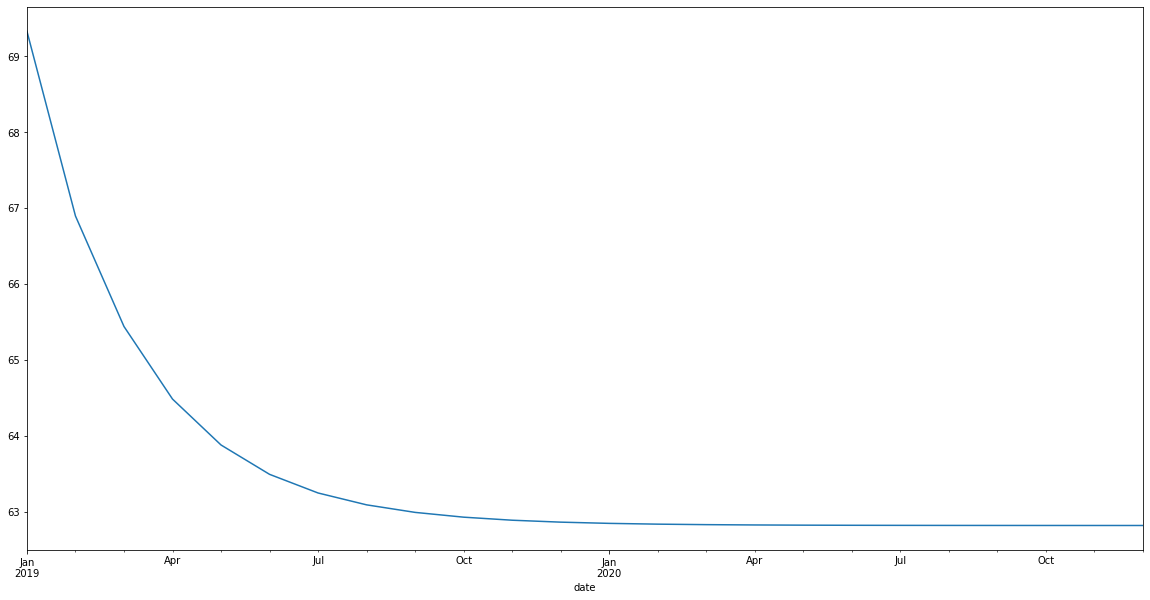

In [154]:
test_data['denorm_price'].plot()

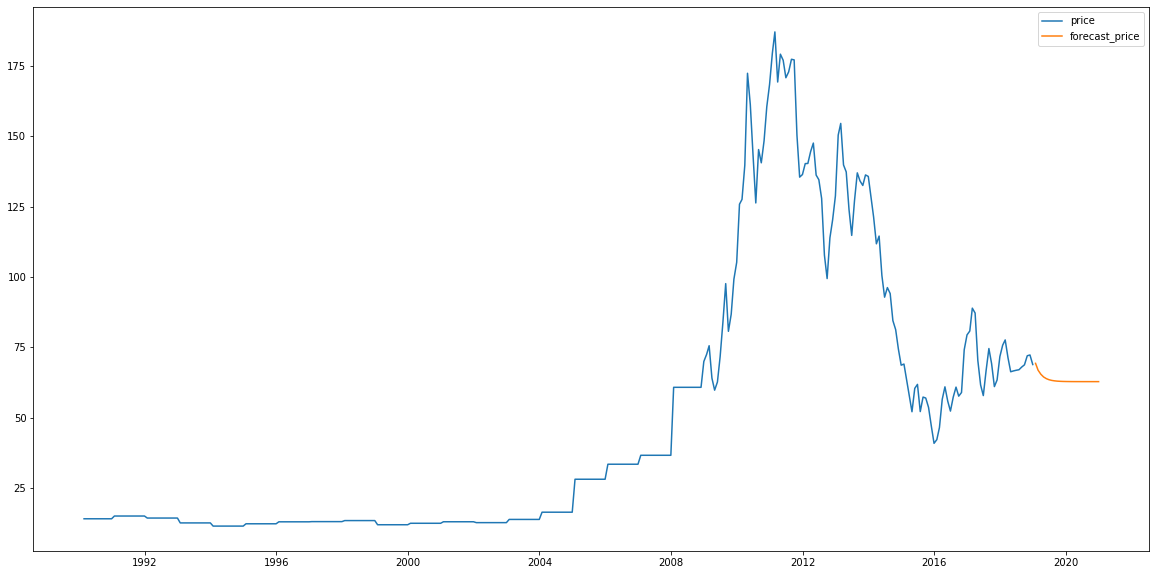

In [155]:
predictdata=pd.DataFrame(df['price'],index=df.index)
plt.rcParams["figure.figsize"]=(20,10)
plt.plot(predictdata)
plt.plot(test_data['denorm_price'])
plt.gca().legend(('price','forecast_price'))

In [156]:
test_data #denorm price the forecast price till 2019 to 2020

,forecast_price,denorm_price
date,,
2019-01-31,0.329335,69.323983
2019-02-28,0.315500,66.892808
2019-03-31,0.307224,65.438469
2019-04-30,0.301790,64.483515
2019-05-31,0.298350,63.879104
2019-06-30,0.296153,63.492916
2019-07-31,0.294756,63.247440
2019-08-31,0.293867,63.091309
2019-09-30,0.293303,62.992107


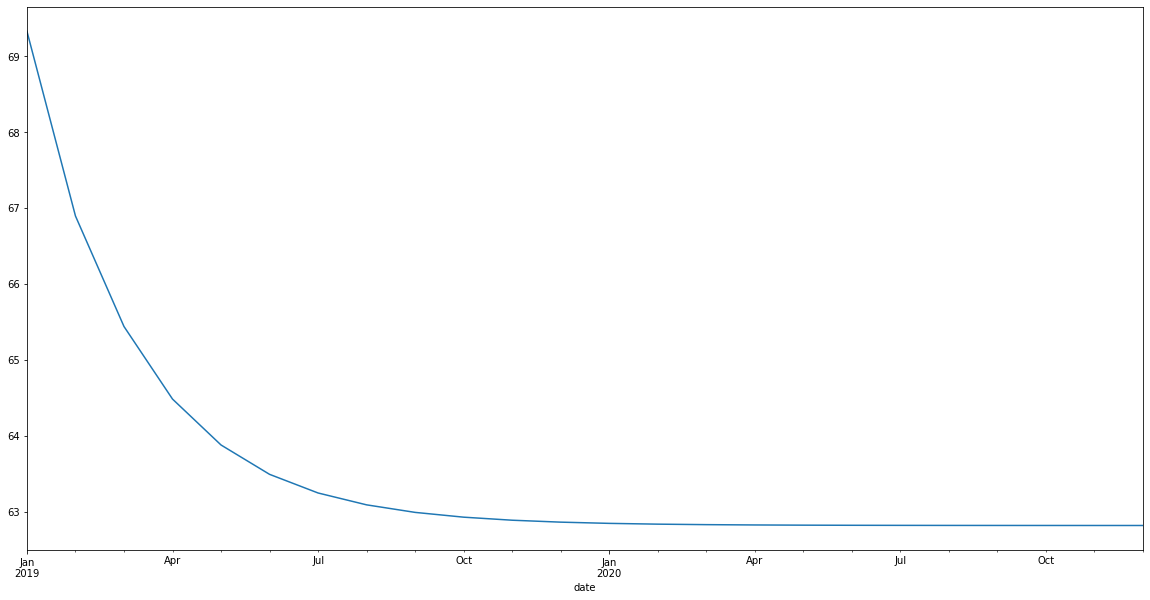

In [157]:
test_data.denorm_price.plot()